# Lab. 8 - K-Means and the LLoid algorithm

In this lab we consider unsupervised settings, and more specifically the problem of data clustering using K-means.

As usual, we start including libraries and utility functions.

In [1]:
# import libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy.linalg as la

In [2]:
def mixGauss(means, sigmas, n):

    means = np.array(means)
    sigmas = np.array(sigmas)

    d = means.shape[1]
    num_classes = sigmas.size
    data = np.full((n * num_classes, d), np.inf)
    labels = np.zeros(n * num_classes)

    for idx, sigma in enumerate(sigmas):
        data[idx * n:(idx + 1) * n] = np.random.multivariate_normal(mean=means[idx], cov=np.eye(d) * sigmas[idx] ** 2,
                                                                    size=n)
        labels[idx * n:(idx + 1) * n] = idx 
        
    if(num_classes == 2):
        labels[labels==0] = -1

    return data, labels

In [22]:
n=100 # number of features for each gaussian
d=30 # total number of features
d_rev = 2 # number of

Xtr, Ytr = mixGauss(means = [[0,0],[0,1]], sigmas = [0.7, 0.7], n=100)
Ytr[Ytr==2]=-1
Xte, Yte = mixGauss(means = [[0,0],[0,1]], sigmas = [0.7, 0.7], n=100)
Yte[Yte==2]=-1

In [23]:
def EuclidDistance(P1,P2):
    v = np.linalg.norm(P1-P2,2)
    return v**2

In [24]:
def allDistances(X1, X2):
    D = np.zeros((X1.shape[0], X2.shape[0]))
    for idx1 in range(np.shape(X1)[0]):
        for idx2 in range(np.shape(X2)[0]):
            D[idx1,idx2] = EuclidDistance(X1[idx1,:],X2[idx2,:])
    return D

##### The Lloid algorithm

We now focus on the implementation of the LLoid algorithm. The arguments of the function are:
- X: the data matrix
- centers0: the initialization of the cluster centers
- maxiter: the maximum number of iterations
The function returns the final clusters centers and the labels associated with each point.


In [7]:
EuclidDistance(Xtr[0,0],Xtr[5:,0])

85.7638612512611

In [54]:
Xtr[0,1]

0.45347162670067737

In [8]:
for i in range(len(Xtr)):
    distance = EuclidDistance(Xtr[0,0],Xtr[i:,0])
    #print (distance)

In [56]:
#Xtr[:,1]

In [12]:
n= np.shape(Xtr)[0]

In [9]:
centers = 5
n_samples,dim = Xtr.shape

In [10]:
np.random.choice(10,4,replace=False)

array([6, 7, 0, 3])

In [69]:
# initialize 
#random_center_idxs = np.random.choice(n_samples, centers, replace=False) # Gets random numbers for indexes
#centroids = [Xtr[idx] for idx in random_sample_idxs]  # Creates a list of initial index points from dataset
#centroids

rand_center_idexes = np.random.choice(n_samples,centers,replace=False) # Gets random numbers for indexes
centroids = [Xtr[index] for index in rand_center_idexes] # Creates a list of initial index points from dataset
centroids

[array([ 1.03775713, -0.44284918]),
 array([0.16434682, 0.23072412]),
 array([0.09699112, 0.41957597]),
 array([-1.17165024,  0.90178751]),
 array([ 0.16438546, -0.68200065])]

In [73]:
new_centroids(p,Xtr)

array([[ 1.01130572, -0.22389649],
       [ 0.18564247,  0.06174113],
       [ 0.14859739,  0.92723367],
       [-0.77435235,  1.14898946],
       [-0.12889794, -0.6539402 ]])

In [6]:
def near_centroid(observation, centroid):
    distances = [EuclidDistance(observation,point) for point in centroids]
    nearest_idx = np.argmin(distances)
    return nearest_idx 
#close_centroid(Xtr[0], centroids)

In [7]:
def create_clusters(centroid,X):
    # Assign the samples to the closest centroids to create clusters
    clusters = [[] for _ in range(len(centroid))]
    for idx, observation in enumerate(X):
        centroid_idx = near_centroid(observation, centroid)
        clusters[centroid_idx].append(idx)
    return clusters
#p=create_clusters(centroids,Xtr)

NameError: name 'centroids' is not defined

In [8]:
def _get_centroids(clusters,Xtr):
    
    centroids = np.zeros((len(p), Xtr.shape[1]))
    for idx, cluster in enumerate(clusters):
        cluster_mean = np.mean(Xtr[cluster], axis=0)
        centroids[cluster_idx] = cluster_mean
    return centroids   

def new_centroids(clusters,X):
    centroids = np.zeros((len(clusters),X.shape[1]))
    for idx, i in enumerate(clusters):
        mean_cluster = np.mean(X[i],axis=0)
        centroids[idx] = mean_cluster
    return centroids    

In [61]:
Xtr.shape

(200, 2)

In [62]:
#_get_centroids(p,Xtr)
new_centroids(p,Xtr)

array([[ 1.48252008, -0.55411345],
       [-0.88593052,  0.61501576],
       [-0.02007926,  0.12837699],
       [ 0.01381432,  1.28310242],
       [ 0.5559516 , -0.43699648]])

In [ ]:
create_clusters(centroids, 4,observation,X)

In [38]:

def Lloid(X, centers, maxiter):
    
    # random centers
    n, dim = np.shape(X)
    rand_center = np.random.choice(n,centers,replace=False) # Gets random numbers for indexes
    centroids = [X[index] for index in rand_center] # Creates a list of initial index points from dataset 
    
    idx_prev = np.zeros((len(centroids),dim)) # 1xn vector storing cluster assignments
    
    for i in np.arange(maxiter):
        # Compute Squared Euclidean distance (i.e. the squared distance)
        # between each cluster centre and each observation
        # Assign data to clusters: for each point, find the minimum distance and the associated center
        clusters = [[] for j in range(len(centroids))]
        
        cluster_obs= [[] for j in range (len(centroids))] 
        
        for index, observation, in enumerate(X):
            centroid_index = near_centroid(observation,centroids)
            clusters[centroid_index].append(index)
            cluster_obs[centroid_index].append(observation)
            
            ## Update cluster center
            old_centroids = centroids
            centroids= new_centroids(clusters,X)
            
            # Check if clusters have not changed
            distances = [EuclidDistance(old_centroids[i],centroids[i]) for i in range(len(centroids))] 
            if sum (distances) == 0:
                break            
        
        Iv = cluster_obs
        
    return Iv, centroids


def near_centroid(observation, centroids):
    distances = [EuclidDistance(observation,point) for point in centroids]
    nearest_idx = np.argmin(distances)
    return nearest_idx 

def new_centroids(clusters,X):
    centroids = np.zeros((len(clusters),X.shape[1]))
    for idx, i in enumerate(clusters):
        mean_cluster = np.mean(X[i],axis=0)
        centroids[idx] = mean_cluster
    return centroids

In [35]:
Lloid(Xtr, 4, 8)

([[array([ 0.32654585, -0.10258987]),
   array([0.25979097, 0.38352698]),
   array([-0.36836994,  0.9124647 ]),
   array([0.29471677, 0.43857216]),
   array([0.31855027, 0.63177233]),
   array([-0.77314735,  1.76507006]),
   array([0.295182 , 0.6679024]),
   array([-0.89868069,  1.52465507]),
   array([0.47955177, 0.56044505]),
   array([0.41203992, 0.59901855]),
   array([-0.62237736,  0.51883227]),
   array([-0.9851776,  0.4761463]),
   array([-0.86723078,  0.96310512]),
   array([-0.08703419,  0.291751  ]),
   array([-0.06131221,  1.04530497]),
   array([-0.78407814,  1.02246914]),
   array([-0.76917413,  0.24395286]),
   array([-0.94046637,  0.48895946]),
   array([0.01768652, 0.0354347 ]),
   array([-0.48059506,  0.47194471]),
   array([0.3451997 , 0.66416224]),
   array([-1.31001613,  0.53932625]),
   array([-0.72544152,  1.71630875]),
   array([-0.08405196, -0.03180337]),
   array([-0.07952503,  0.74956905]),
   array([-0.58006704,  0.12965069]),
   array([0.03437921, 0.63227464

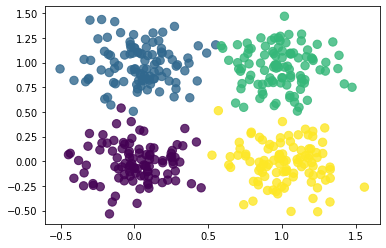

In [32]:
# Build a dataset with at least 4 classes and plot it
X, Y = mixGauss([[0,0], [0,1], [1,1], [1,0]], [0.2, 0.2, 0.2, 0.2], 100)
plt.scatter(X[:,0], X[:,1], s=70, c=Y, alpha=0.8)

In [33]:
np.shape(X)

(400, 2)

6


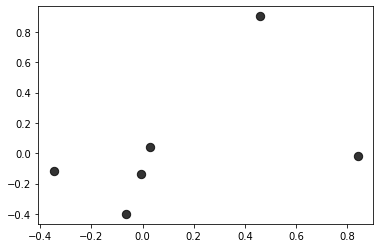

In [43]:
# Try with a random initialization of the centers.
# NOTE: TRY MULTIPLE TIMES!
import random 

k = np.shape(X)[0] # ... fill here ...   k = np.shape(centers)[0]
dim = np.shape(X)[1]
centers0 =  random.randint(2,10)
print(centers0)

# Call the Lloid function
Iv, centers = Lloid(X,centers0 , 8)

# Visualize the final clusters and their centroids
#plt.scatter(X[:,0], X[:,1], s=70, c=Iv, alpha=0.8)
plt.scatter(centers[:,0], centers[:,1], s=70, c='k', alpha=0.8)


##### K-Means++

We now consider a better strategy to initialize the centers of the clusters, i.e. selecting points with maximum distance among them. Have a look to the following function.

In [ ]:
def kMeanspp(X,k):

    n, d = np.shape(X)

    IdxC = np.random.permutation(np.shape(X)[0])
    
    centers = np.zeros((k,d))

    centers[0,:] = X[IdxC[0],:]

    for i in np.arange(1,k):
        
        D = allSEDistances(centers[:i,:], X)
        idx = np.argmin(D,axis=0)
        Ds = np.min(D,axis=0)

        D2 = Ds**2
        P = np.divide(D2, np.sum(D2))
        
        newcpos = np.argmax(P)
        centers[i,:] = X[newcpos,:]
        
    return centers

In [ ]:
# Try and use K-Means++ for initialization
k = 4
centers0 = # ... fill here ...

# Call the Lloid function
Iv, centers = # ... fill here ...

# Visualize the final clusters and their centroids
plt.scatter(X[:,0], X[:,1], s=70, c=Iv, alpha=0.8)
plt.scatter(centers[:,0], centers[:,1], s=70, c='k', alpha=0.8)